In [3]:
import sys
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# getcwd - current working directory, joining to .. which symboli
# abspath - removes all the .. etc
parent_dir = os.path.abspath(os.path.join(os.getcwd(),'..'))
if parent_dir not in sys.path:
    sys.path.insert(0,parent_dir)
    
from common_utils import EDA

In [4]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_final = pd.read_csv('data/sample_submission.csv')

# Dataset Overview

In [5]:
num_cols, cat_cols = EDA.dataset_overview(df=df)

==================================== Dataset Overview ====================================

============ Data Shape ============
Rows: 7905
Columns: 20


============ Datatypes ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64



============ Duplicates Values ============
Duplicated values : 0
============ Data Preview ============
Head:


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D


Tail:


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D
7904,7904,1978,D-penicillamine,19237,F,N,N,N,N,0.7,256.0,3.23,22.0,645.0,74.40,85.0,336.0,10.3,3.0,C


Sample:


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
3998,3998,3762,Placebo,19619,F,N,Y,Y,N,1.4,259.0,4.16,46.0,1104.0,79.05,79.0,251.0,12.0,4.0,D
6940,6940,1077,D-penicillamine,12641,M,N,Y,N,N,0.8,263.0,3.35,65.0,1214.0,130.20,68.0,295.0,10.5,3.0,C
4082,4082,1790,Placebo,14772,F,N,Y,Y,N,17.4,242.0,3.56,161.0,2412.0,167.40,130.0,268.0,9.8,4.0,C




============ Numerical and Categorical Values ============
Numerical Datatypes: Index(['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
Number of numeric features: 13
Categorical Datatypes: Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')
Number of categorical features: 7


# Observations
1. 12 numeric features (1 id column)
2. 6 categorical features 
3. Target is also categorical

In [6]:
num_cols = num_cols.drop('id')

# Numerical Analysis

****************************** N_Days analysis ******************************


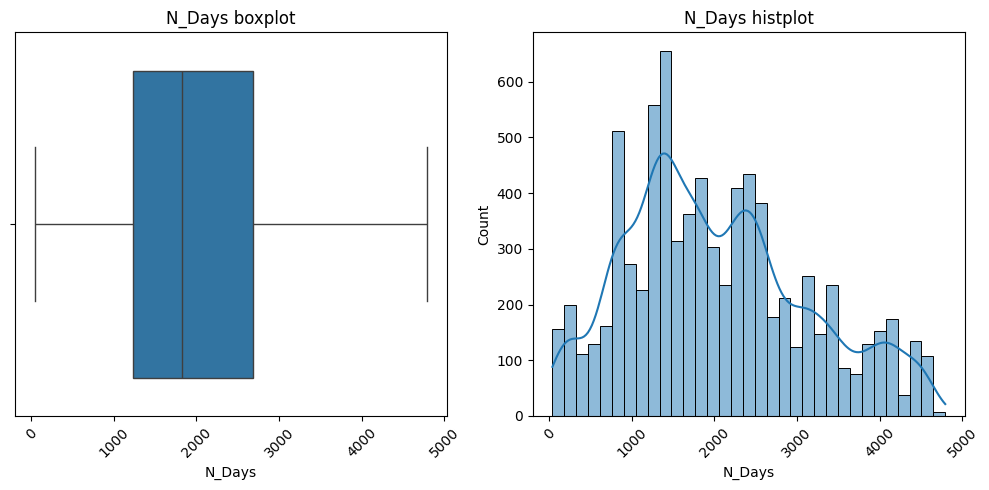

********************  N_Days values description  ********************


,N_Days
count,7905.000000
mean,2030.173308
std,1094.233744
min,41.000000
25%,1230.000000
50%,1831.000000
75%,2689.000000
max,4795.000000


********************  N_Days outliers  ********************
IQR : 1459.0




****************************** Age analysis ******************************


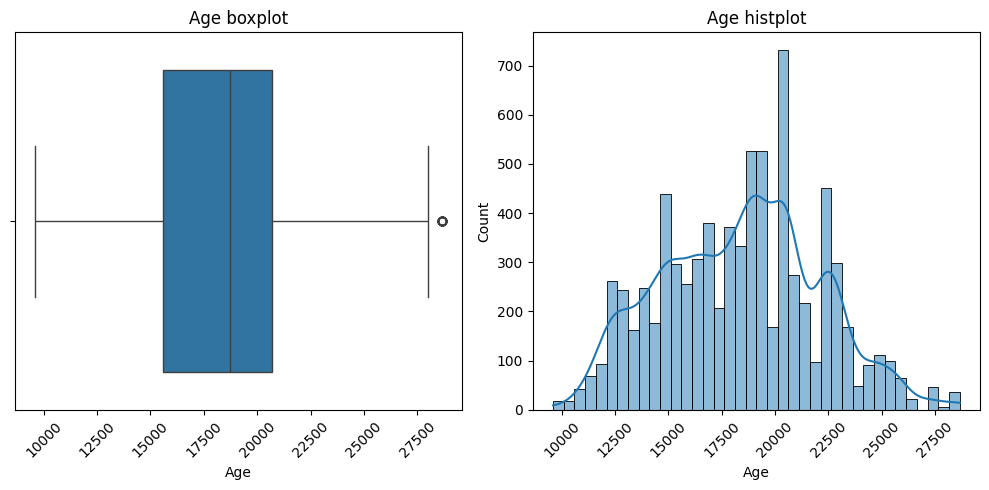

********************  Age values description  ********************


,Age
count,7905.000000
mean,18373.146490
std,3679.958739
min,9598.000000
25%,15574.000000
50%,18713.000000
75%,20684.000000
max,28650.000000


********************  Age outliers  ********************
IQR : 5110.0
****** Upper Outliers ******
Upper outlier count: 36


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
179,179,930,Placebo,28650,M,N,Y,N,N,7.1,468.0,2.81,139.0,2009.0,198.40,139.0,233.0,10.0,4.0,D
480,480,1765,Placebo,28650,F,N,Y,N,N,3.4,360.0,3.55,102.0,1536.0,147.25,135.0,195.0,9.8,4.0,D
515,515,1765,D-penicillamine,28650,F,Y,Y,Y,N,7.1,243.0,3.03,380.0,983.0,158.10,154.0,97.0,10.0,4.0,C






****************************** Bilirubin analysis ******************************


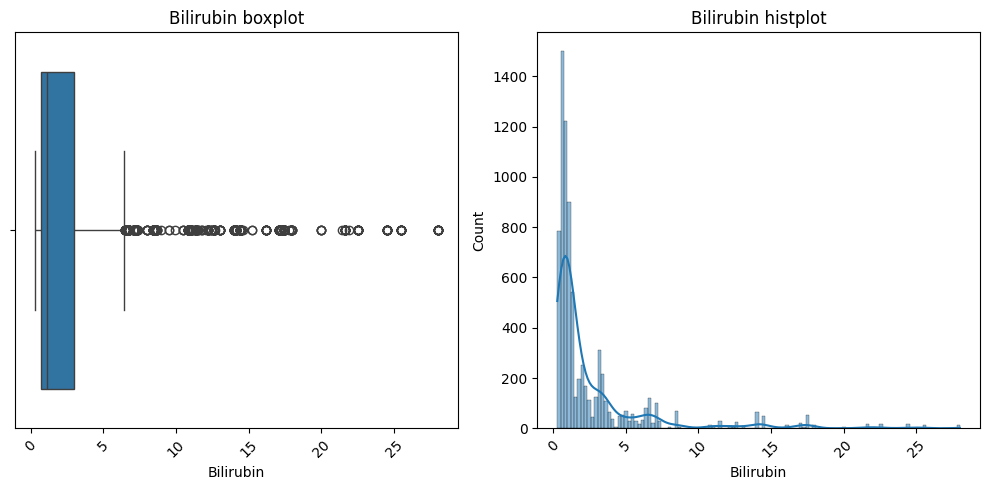

********************  Bilirubin values description  ********************


,Bilirubin
count,7905.000000
mean,2.594485
std,3.812960
min,0.300000
25%,0.700000
50%,1.100000
75%,3.000000
max,28.000000


********************  Bilirubin outliers  ********************
IQR : 2.3
****** Upper Outliers ******
Upper outlier count: 789


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
21,21,326,D-penicillamine,18199,F,N,Y,Y,S,6.6,244.0,3.02,199.0,1819.0,170.50,91.0,132.0,12.1,4.0,D
29,29,943,Placebo,19002,F,N,N,N,N,28.0,556.0,3.26,39.0,1713.0,171.00,171.0,348.0,10.2,3.0,D
54,54,51,Placebo,25772,M,N,Y,Y,N,12.6,200.0,2.74,140.0,918.0,122.45,143.0,302.0,11.5,4.0,D






****************************** Cholesterol analysis ******************************


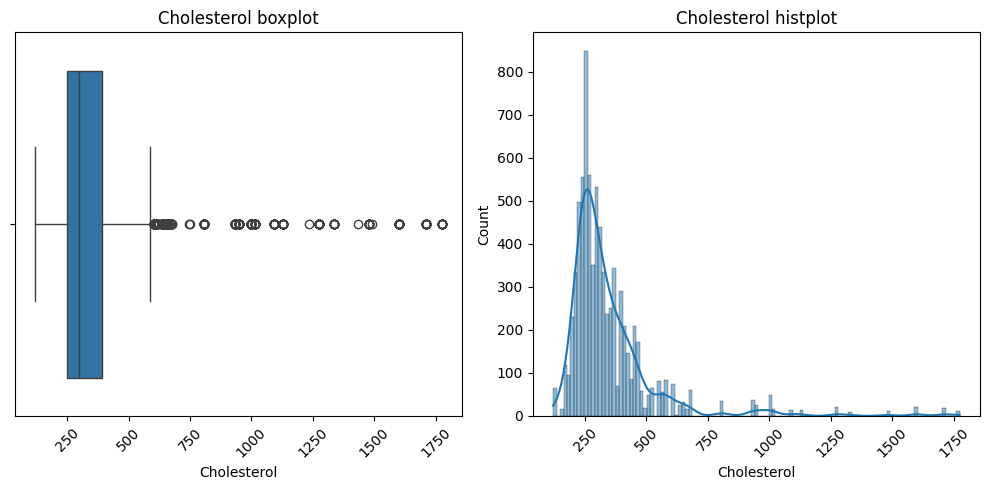

********************  Cholesterol values description  ********************


,Cholesterol
count,7905.000000
mean,350.561923
std,195.379344
min,120.000000
25%,248.000000
50%,298.000000
75%,390.000000
max,1775.000000


********************  Cholesterol outliers  ********************
IQR : 142.0
****** Upper Outliers ******
Upper outlier count: 502


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
45,45,994,D-penicillamine,17703,F,N,Y,N,S,1.2,1000.0,3.76,32.0,289.0,97.00,100.0,289.0,9.8,4.0,C
59,59,2769,Placebo,18733,F,N,Y,N,N,8.6,1276.0,3.26,84.0,1960.0,457.25,157.0,213.0,10.7,3.0,D
69,69,732,Placebo,13178,F,N,Y,N,N,6.1,1712.0,3.40,89.0,3681.0,158.10,139.0,297.0,10.2,3.0,D






****************************** Albumin analysis ******************************


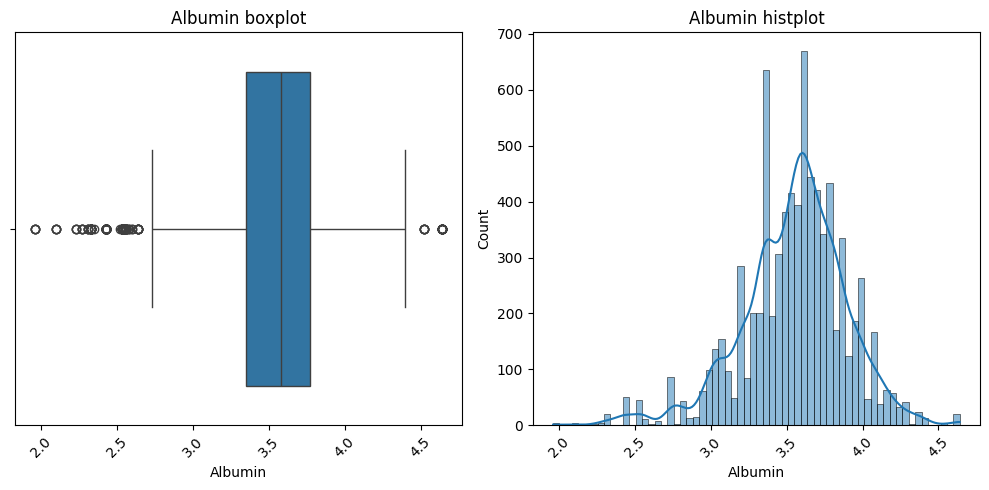

********************  Albumin values description  ********************


,Albumin
count,7905.000000
mean,3.548323
std,0.346171
min,1.960000
25%,3.350000
50%,3.580000
75%,3.770000
max,4.640000


********************  Albumin outliers  ********************
IQR : 0.41999999999999993
****** Upper Outliers ******
Upper outlier count: 25


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
479,479,3992,Placebo,20684,F,N,Y,N,N,1.3,290.0,4.64,39.0,836.0,137.95,146.0,430.0,11.5,2.0,C
608,608,2503,Placebo,16094,F,N,N,N,N,0.5,188.0,4.52,28.0,645.0,72.85,188.0,203.0,11.1,3.0,C
617,617,2363,Placebo,14812,F,N,N,N,N,1.9,932.0,4.64,227.0,1052.0,158.10,157.0,381.0,9.6,3.0,C


****** Lower Outliers ******
Lower outlier count: 153


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
216,216,321,Placebo,15116,F,N,Y,Y,N,3.6,260.0,2.54,172.0,7277.0,121.26,158.0,124.0,10.6,4.0,D
224,224,3468,Placebo,13918,F,Y,Y,Y,Y,11.5,178.0,2.33,138.0,1029.0,119.35,91.0,195.0,11.7,3.0,D
272,272,334,D-penicillamine,22388,F,Y,Y,N,Y,14.5,448.0,2.43,123.0,1833.0,134.00,155.0,210.0,11.1,4.0,D






****************************** Copper analysis ******************************


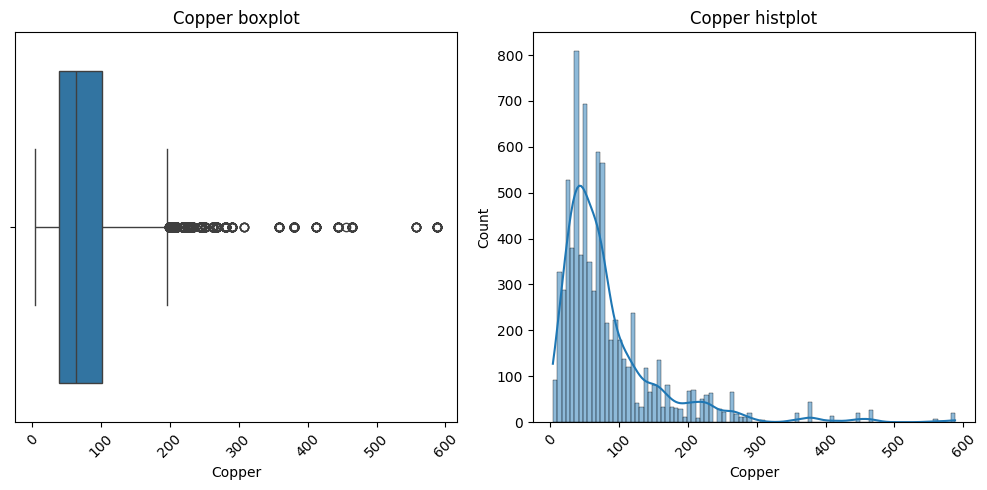

********************  Copper values description  ********************


,Copper
count,7905.000000
mean,83.902846
std,75.899266
min,4.000000
25%,39.000000
50%,63.000000
75%,102.000000
max,588.000000


********************  Copper outliers  ********************
IQR : 63.0
****** Upper Outliers ******
Upper outlier count: 655


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
21,21,326,D-penicillamine,18199,F,N,Y,Y,S,6.6,244.0,3.02,199.0,1819.0,170.50,91.0,132.0,12.1,4.0,D
33,33,3090,Placebo,20254,F,N,N,N,N,3.9,373.0,3.67,281.0,754.0,130.20,89.0,277.0,11.6,2.0,D
80,80,769,Placebo,13073,F,N,Y,N,N,14.0,808.0,3.83,251.0,2870.0,153.45,91.0,268.0,11.4,3.0,D






****************************** Alk_Phos analysis ******************************


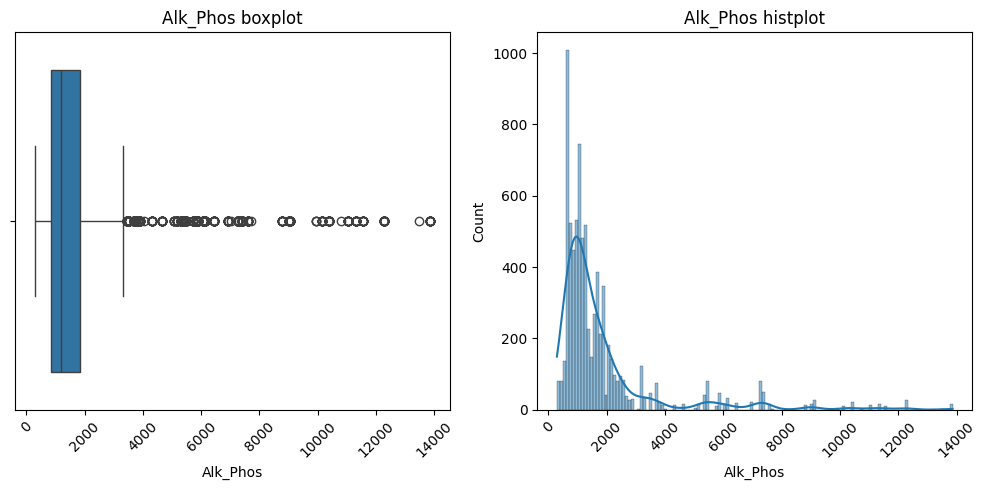

********************  Alk_Phos values description  ********************


,Alk_Phos
count,7905.000000
mean,1816.745250
std,1903.750657
min,289.000000
25%,834.000000
50%,1181.000000
75%,1857.000000
max,13862.400000


********************  Alk_Phos outliers  ********************
IQR : 1023.0
****** Upper Outliers ******
Upper outlier count: 792


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
5,5,703,D-penicillamine,19270,F,N,Y,N,N,0.6,227.0,3.46,34.0,6456.2,60.63,68.0,213.0,11.5,3.0,D
35,35,2168,D-penicillamine,21532,F,N,N,N,N,1.1,290.0,4.40,40.0,3472.0,106.95,146.0,447.0,10.0,1.0,C
53,53,4050,D-penicillamine,20459,F,N,Y,N,N,1.1,460.0,4.09,32.0,5430.2,74.40,118.0,79.0,11.5,3.0,C






****************************** SGOT analysis ******************************


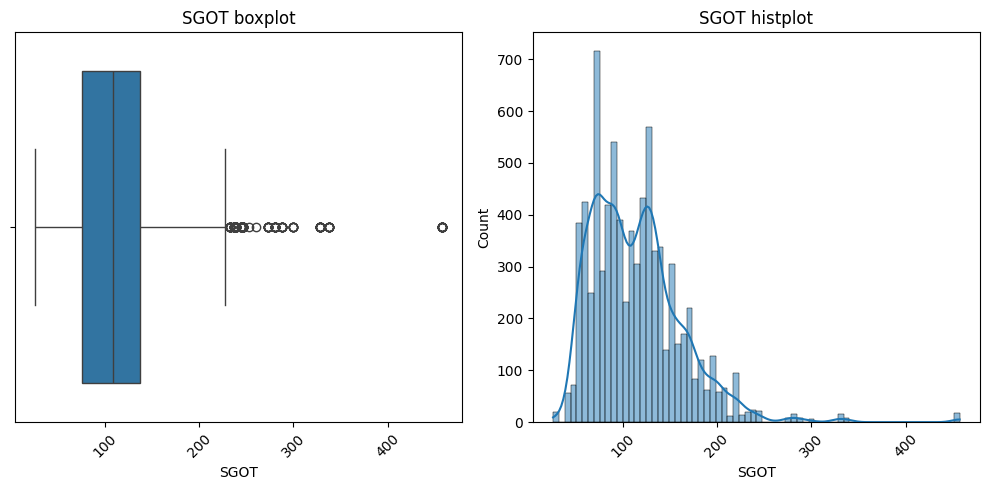

********************  SGOT values description  ********************


,SGOT
count,7905.000000
mean,114.604602
std,48.790945
min,26.350000
25%,75.950000
50%,108.500000
75%,137.950000
max,457.250000


********************  SGOT outliers  ********************
IQR : 61.999999999999986
****** Upper Outliers ******
Upper outlier count: 146


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
25,25,799,Placebo,27220,F,N,Y,N,N,1.3,325.0,3.60,81.0,2065.0,232.50,100.0,277.0,11.1,4.0,C
59,59,2769,Placebo,18733,F,N,Y,N,N,8.6,1276.0,3.26,84.0,1960.0,457.25,157.0,213.0,10.7,3.0,D
131,131,1250,Placebo,22156,F,N,Y,Y,N,5.5,528.0,3.31,97.0,5184.0,244.90,133.0,467.0,10.6,4.0,D






****************************** Tryglicerides analysis ******************************


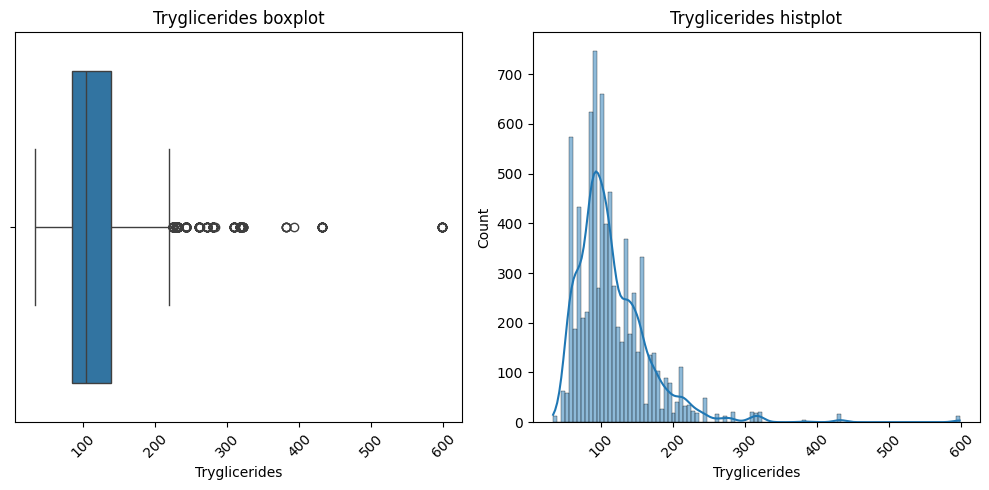

********************  Tryglicerides values description  ********************


,Tryglicerides
count,7905.000000
mean,115.340164
std,52.530402
min,33.000000
25%,84.000000
50%,104.000000
75%,139.000000
max,598.000000


********************  Tryglicerides outliers  ********************
IQR : 55.0
****** Upper Outliers ******
Upper outlier count: 267


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
62,62,980,D-penicillamine,24681,F,N,N,N,N,6.4,347.0,3.77,90.0,960.0,86.00,242.0,251.0,10.4,3.0,D
97,97,1455,D-penicillamine,14812,M,N,N,Y,N,3.4,448.0,3.56,88.0,924.0,120.90,318.0,283.0,11.0,4.0,D
128,128,2976,D-penicillamine,18719,F,N,N,N,N,0.9,420.0,3.76,22.0,676.0,57.35,232.0,270.0,10.0,2.0,C






****************************** Platelets analysis ******************************


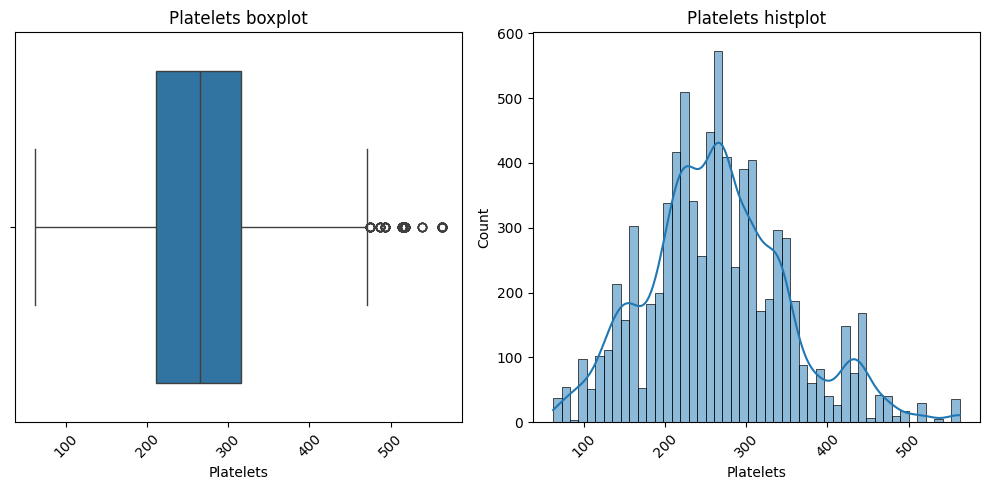

********************  Platelets values description  ********************


,Platelets
count,7905.000000
mean,265.228969
std,87.465579
min,62.000000
25%,211.000000
50%,265.000000
75%,316.000000
max,563.000000


********************  Platelets outliers  ********************
IQR : 105.0
****** Upper Outliers ******
Upper outlier count: 114


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
26,26,1832,Placebo,17442,F,N,Y,N,N,2.0,328.0,3.35,76.0,2276.0,114.70,104.0,518.0,10.0,4.0,D
110,110,794,D-penicillamine,16718,M,N,Y,N,N,1.8,528.0,3.20,18.0,2148.0,128.65,171.0,563.0,10.6,4.0,D
137,137,2583,D-penicillamine,20233,F,N,Y,N,N,0.7,226.0,3.90,13.0,9066.8,72.85,62.0,563.0,11.6,4.0,D






****************************** Prothrombin analysis ******************************


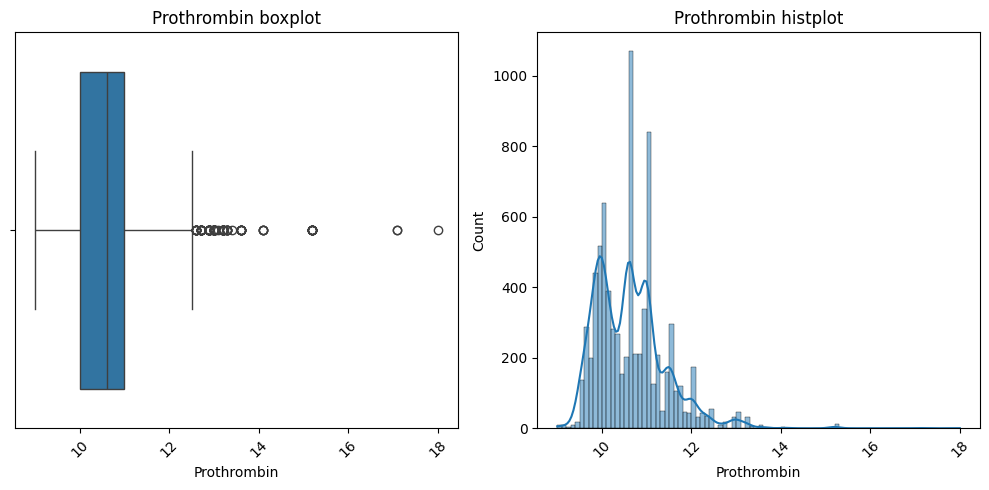

********************  Prothrombin values description  ********************


,Prothrombin
count,7905.000000
mean,10.629462
std,0.781735
min,9.000000
25%,10.000000
50%,10.600000
75%,11.000000
max,18.000000


********************  Prothrombin outliers  ********************
IQR : 1.0
****** Upper Outliers ******
Upper outlier count: 173


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
63,63,853,Placebo,19619,F,N,N,Y,N,2.6,236.0,3.52,94.0,591.0,82.15,95.0,221.0,13.6,4.0,D
96,96,850,Placebo,22646,F,N,Y,Y,N,2.8,242.0,3.08,74.0,614.0,136.40,104.0,316.0,13.2,4.0,D
342,342,3574,D-penicillamine,18731,F,N,Y,N,N,3.1,151.0,3.59,121.0,1136.0,120.00,55.0,221.0,13.0,3.0,D






****************************** Stage analysis ******************************


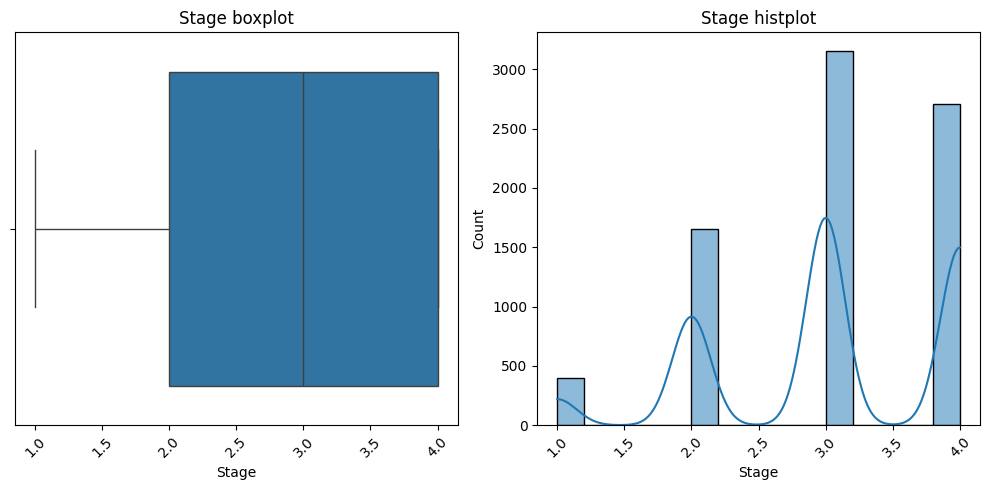

********************  Stage values description  ********************


,Stage
count,7905.000000
mean,3.032511
std,0.866511
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


********************  Stage outliers  ********************
IQR : 2.0






In [7]:
for col in num_cols:
    EDA.num_analysis(df=df,col=col)

# Observations: 
1. Data is quite normal with not many outliers and not much skew

****************************** Drug analysis ******************************
Number of Unique Drug values: 2


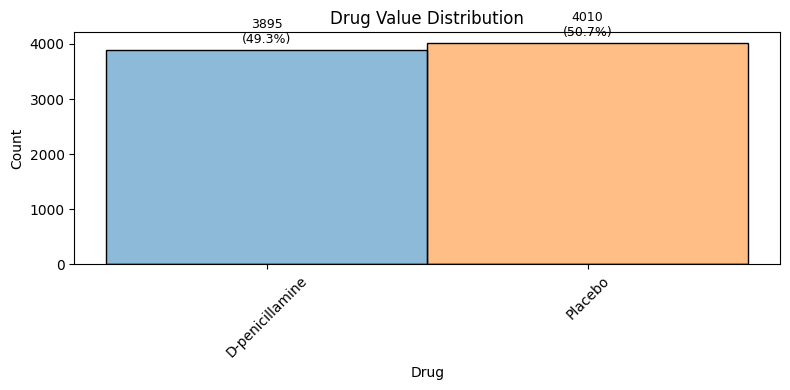





****************************** Sex analysis ******************************
Number of Unique Sex values: 2


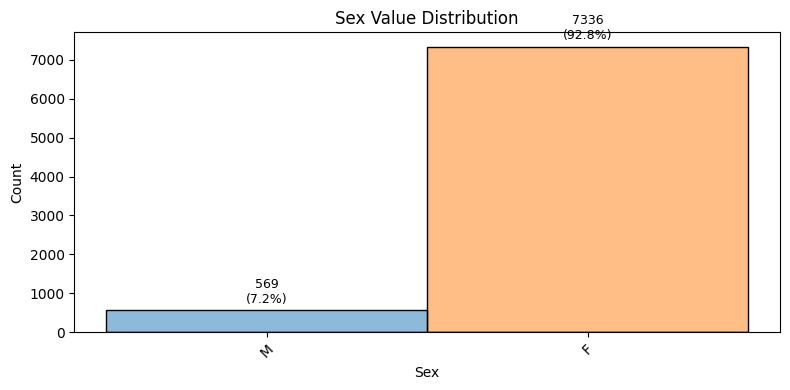





****************************** Ascites analysis ******************************
Number of Unique Ascites values: 2


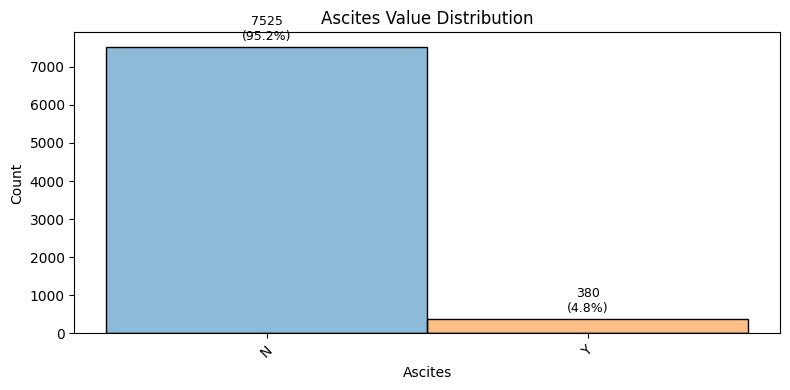





****************************** Hepatomegaly analysis ******************************
Number of Unique Hepatomegaly values: 2


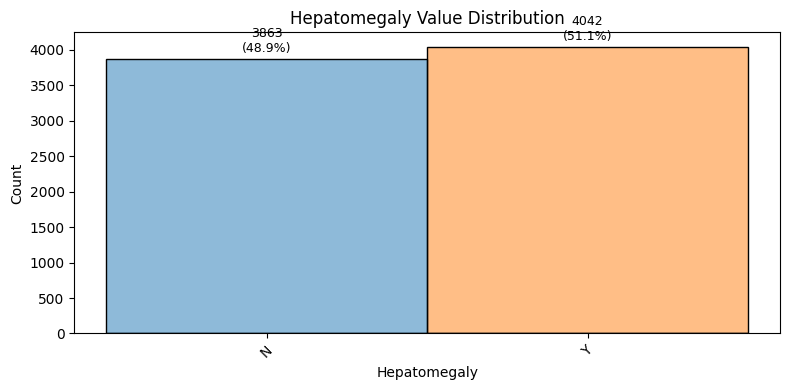





****************************** Spiders analysis ******************************
Number of Unique Spiders values: 2


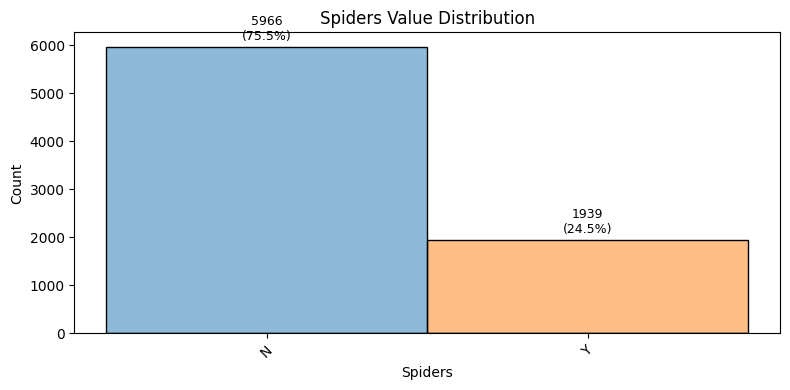





****************************** Edema analysis ******************************
Number of Unique Edema values: 3


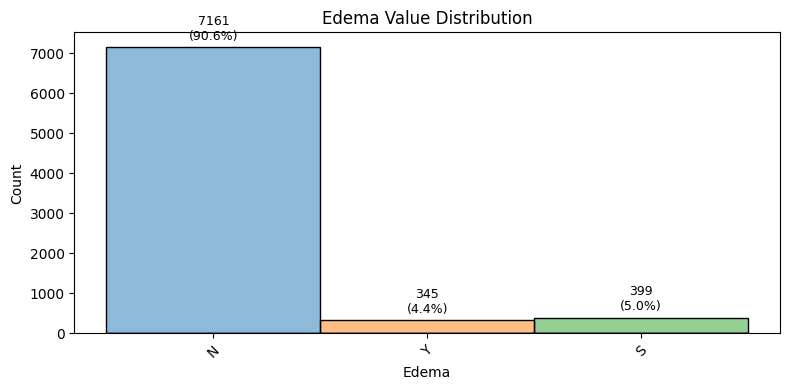





****************************** Status analysis ******************************
Number of Unique Status values: 3


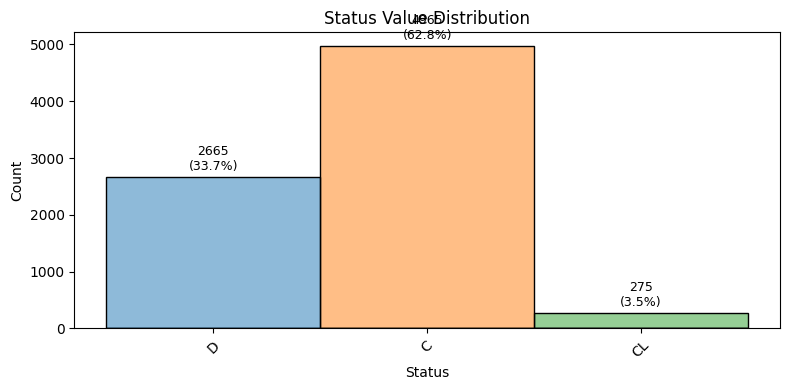

In [8]:
for col in cat_cols:
    EDA.categorical_analysis(df,col)

# Observations
1. Quite a few categorical features but low cardinality for each
2. Can be encoded with one-hot if necessary, except with catboost


In [9]:
df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

# Correlation and relationships between features

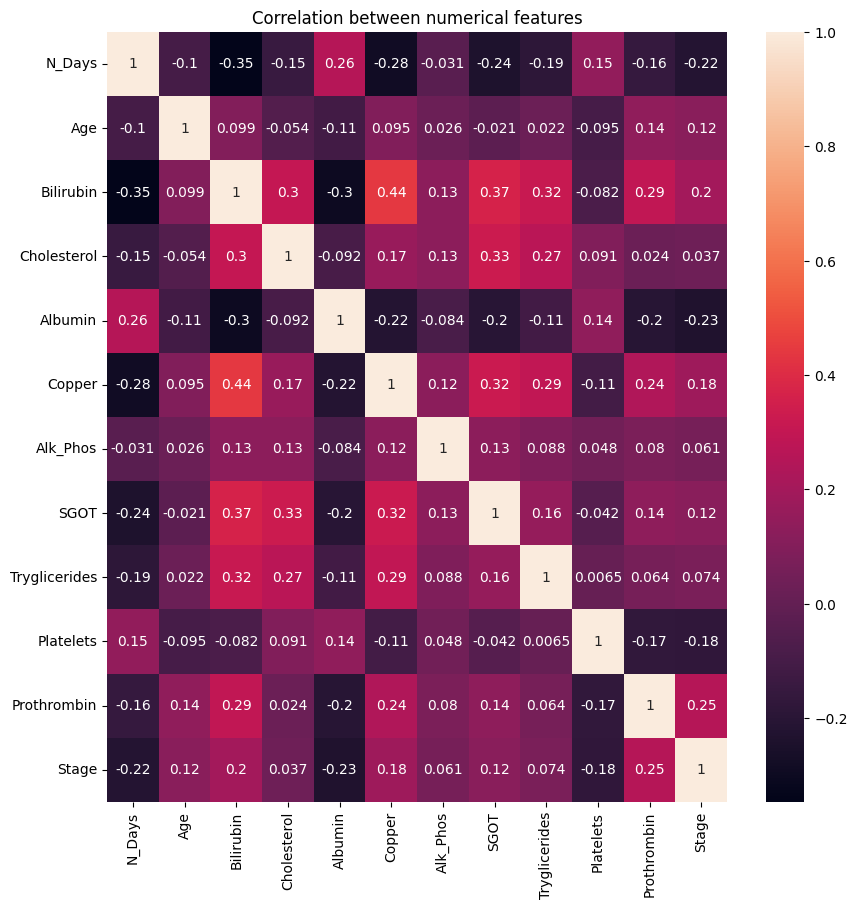

In [10]:
df_corr = df[num_cols].corr()

plt.figure(figsize=(10,10))
plt.title('Correlation between numerical features')
sns.heatmap(df_corr,annot=True)
plt.show()

In [11]:
# there are many relationships between the numerical features ranging from low to medium, low risk of multicollinearity

In [12]:
# What is the relationship between blood work levels and the Stage of cirrhosis?
bloodwork = num_cols.drop(['N_Days','Age','Stage'])

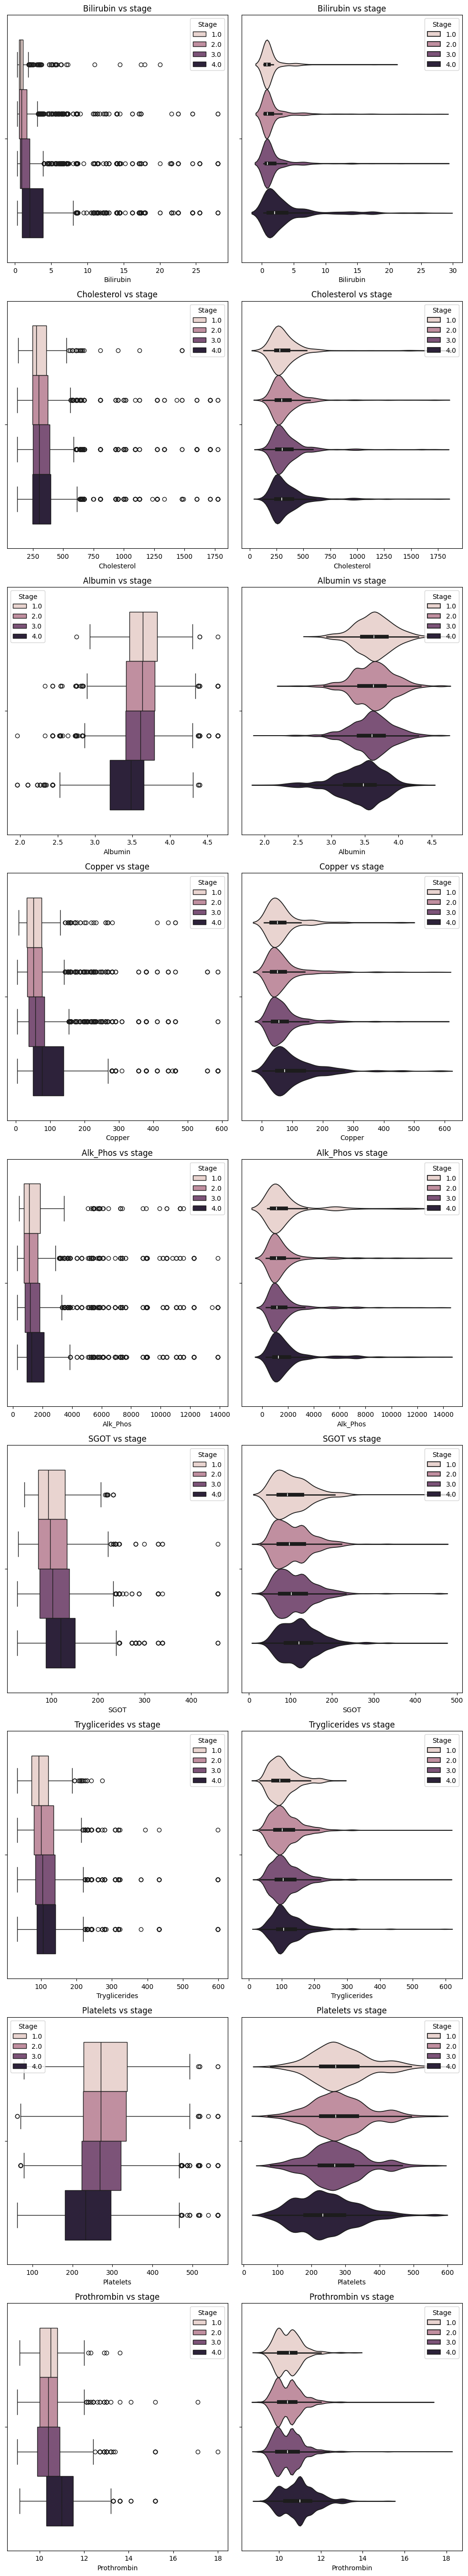

In [13]:
fig,axs = plt.subplots(ncols=2,nrows=len(bloodwork),figsize=(10,6*len(bloodwork)))
for i,col in enumerate(bloodwork):
    axs[i,0].set_title(f"{col} vs stage")
    sns.boxplot(data=df,x=col,hue='Stage',ax=axs[i,0])
    axs[i,1].set_title(f"{col} vs stage")
    sns.violinplot(data=df,x=col,hue='Stage',ax=axs[i,1])
plt.tight_layout()
plt.show()

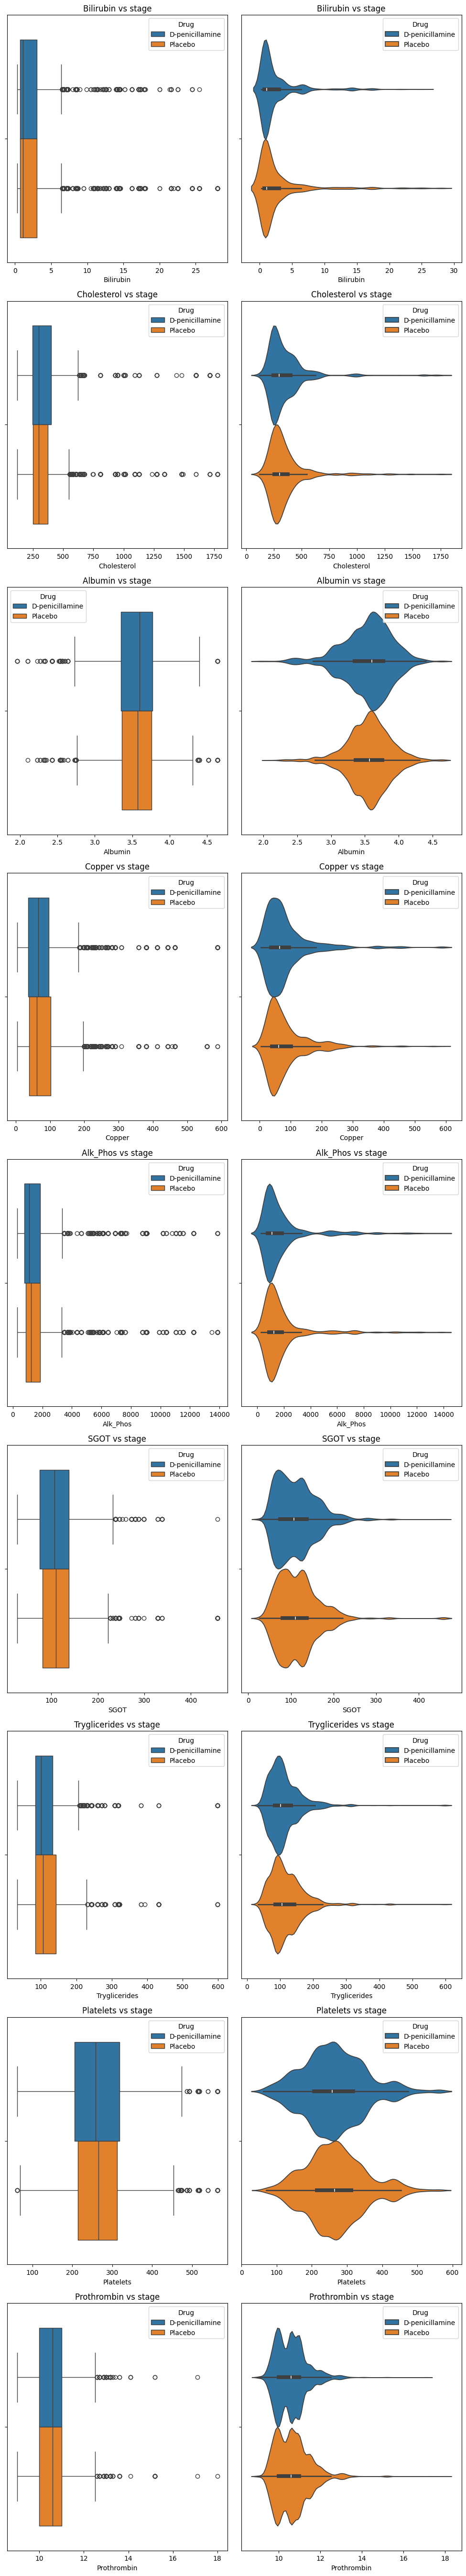

In [14]:
# How does placebo affect bloodwork?

fig,axs = plt.subplots(ncols=2,nrows=len(bloodwork),figsize=(10,6*len(bloodwork)))
for i,col in enumerate(bloodwork):
    axs[i,0].set_title(f"{col} vs stage")
    sns.boxplot(data=df,x=col,hue='Drug',ax=axs[i,0])
    axs[i,1].set_title(f"{col} vs stage")
    sns.violinplot(data=df,x=col,hue='Drug',ax=axs[i,1])
plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, average_precision_score, label_ranking_average_precision_score, roc_auc_score, make_scorer
from sklearn.impute import SimpleImputer
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
import optuna

In [17]:
df.head(3)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D


In [ ]:
X = df.drop(columns=['id','Status'])
y = df['Status']

In [29]:
cat_cols_training = cat_cols.drop('Status').to_list()

In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations',500,1000),
        'learning_rate': trial.suggest_float('learning_rate',0.01,0.3),
        'depth':trial.suggest_int('depth',5,10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg',2,10),
        'task_type':'GPU',
        'verbose':0,
        'cat_features':cat_cols_training
    }
    
    def multiclass_logloss(y_true,y_pred,eps=1e-15):
        y_pred = np.array(y_pred)
        row_sums = y_pred.sum(axis=1, keepdims=True)
        y_pred = y_pred/row_sums
        y_pred = np.clip(y_pred,eps,1-eps)
        
        # At this stage, y_pred should contain an array where rows correspond to the predicted probabilities for the 3 classes that have been normalized and clipped so avoid being 0 or 1
        
        n_samples = len(y_true)
        n_classes = y_pred.shape[1]
        y_one_hot = np.zeros((n_samples,n_classes))
        
        # There is now a zeroes array that we now need to populate with the true class
        y_one_hot[np.arange(n_samples), y_true] = 1
        
        log_loss = -np.sum(y_one_hot * np.log(y_pred)) / n_samples
        
        return log_loss
    
    scorer = make_scorer(multiclass_logloss, greater_is_better=False)
    
    model = CatBoostClassifier(**params)
    score = cross_val_score(estimator= model, scoring=scorer, cv=3,X=X,y=y, needs_proba =True)
    
    return np.mean(score)
        
        

In [37]:
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective,n_trials=100)

[I 2025-06-27 20:25:30,024] A new study created in memory with name: no-name-2cc82402-1949-4227-a829-683281b0e006
c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\JEFF\AppData\Local\Temp\ipykernel_5644\4278105836.py", line 15, in multiclass_logloss
    y_pred = y_pred/row_sums
             ~~~~~~^~~~~~~~~
TypeError: unsupported operand type(s) for /: 'str' and 'str'

  warnings.warn(
[W 2025-06-27 20:25:54,071] Trial 

KeyboardInterrupt: 